# CPSC 392 Final Project
### Dan Haub

In [118]:
%matplotlib inline
# %matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering
from sklearn.cluster import KMeans # k-means
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix #model evaluation
from sklearn.metrics import silhouette_score


from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.utils import shuffle

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from mizani.breaks import date_breaks
from mizani.formatters import date_format

pd.set_option('display.max_rows', 100)



np.random.seed(11132009)

In [72]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

fpath = '../Personal Folders/Dan/futura_medium_condensed_bt.ttf'
futura = fm.FontProperties(fname=fpath)



FMF_Palette = ["#5C5C5C","#46ACC8","#E2D200","#DD8D29","#E58601","#B40F20"]
Cav_Palette = ["#D8B70A","#02401B","#A2A475","#81A88D","#972D15","#1B1B37"]
BRk_Palette = ["#FD8688","#CB2314","#FAD510","#5B7C3C","#3B4868","#1E1E1E"]

In [3]:
print(futura)

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=../Personal Folders/Dan/futura\_medium\_condensed\_bt.ttf:size=10.0


## 1- What insights can we find by analyzing variable trends over the years?

The trends of all the different variables through the years show many historical and cultural events over the last 100 years. See the capitons of each of the figures for specific details!

### Changes since part 3:
* No prediction/clustering is performed for this question
* Analysis is limited only to variable trends throuhgout years
    * Both changes were made due to lack of available time.

In [4]:
data_1 = pd.read_csv("../Data/data_modified.csv")
data_1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year,name,artists
0,0.995,0.514,172133,0.2560,0.00000,0.3490,-15.145,0,0.0871,79.467,0.574,0,0,1,1921,Si J'avais Su,['Alice Cocéa']
1,0.994,0.426,177733,0.2260,0.00000,0.2350,-16.126,0,0.0693,73.630,0.552,0,9,1,1921,Elle Porte Un Nom Charmant,['André Urban']
2,0.971,0.540,122000,0.0848,0.00196,0.0887,-16.055,0,0.0750,100.296,0.527,0,5,0,1921,A Ballynure Ballad,['Christopher Lynch']
3,0.950,0.607,163200,0.1380,0.00000,0.1140,-15.683,0,0.1570,113.282,0.511,0,3,1,1921,I Met Her In The Garden Where The Praties Grow,['Christopher Lynch']
4,0.969,0.344,120067,0.1310,0.00000,0.1450,-14.261,0,0.0616,178.212,0.257,0,10,0,1921,Just A Little Bit Of Heaven,['Christopher Lynch']


In [5]:
## DATA AGGREGATION ##

# CONTINUOUS VARIABLES #

cont_features_1 = ["acousticness", 
                   "danceability", 
                   "duration_ms", 
                   "energy", 
                   "instrumentalness", 
                   "liveness", 
                   "loudness", 
                   "popularity", 
                   "speechiness", 
                   "tempo", 
                   "valence"]
data_agg_cols_1 = ["year"] + cont_features_1
data_agg_1 = pd.DataFrame(columns = data_agg_cols_1)

# CATEGORICAL VARIABLES #

#Kyes
key_cols_1 = ["year", "key", "number", "percentage"]
key_distro_1 = pd.DataFrame(columns = key_cols_1)

#Mode
mode_cols_1 = ["year", "mode", "number", "percentage"]
mode_distro_1 = pd.DataFrame(columns = mode_cols_1)

#Explicit
explicit_cols_1 = ["year", "explicit", "number", "percentage"]
explicit_distro_1 = pd.DataFrame(columns = explicit_cols_1)

In [6]:
# Loop through each year
for i in range (1921, 2021):
    # Create a temporary dataframe for the year
    inYr = data_1["year"] == i
    yrDF = data_1.loc[inYr]
    
    ### CONTINUOUS VARIABLES ###
    
    data_agg_1 = data_agg_1.append(pd.DataFrame({"year" : [float(i)],
                                                 "acousticness": yrDF["acousticness"].mean(), 
                                                 "danceability": yrDF["danceability"].mean(), 
                                                 "duration_ms": yrDF["duration_ms"].mean(), 
                                                 "energy": yrDF["energy"].mean(), 
                                                 "instrumentalness": yrDF["instrumentalness"].mean(), 
                                                 "liveness": yrDF["liveness"].mean(), 
                                                 "loudness": yrDF["loudness"].mean(), 
                                                 "popularity": yrDF["popularity"].mean(), 
                                                 "speechiness": yrDF["speechiness"].mean(), 
                                                 "tempo": yrDF["tempo"].mean(), 
                                                 "valence": yrDF["valence"].mean()}))
    
    #### KYES ####
    
    # Count number of times each key is used in the year
    num_keys = np.array([0] * 12)
    
    for j in yrDF['key']:
        num_keys[j] = num_keys[j] + 1
    
    # Calculate percentage for each key
    percent_keys = num_keys / yrDF.shape[0]
    
    # Add each year/key pair to the key_distro_1 DF
    for j in range (0, 12):
        key_distro_1 = key_distro_1.append(pd.DataFrame({"year":[i],
                                                         "key": [j],
                                                         "number": [num_keys[j]],
                                                         "percentage": [percent_keys[j]]}))
        
    #### MODES ####
    
    # Count number of times each mode is used in the year
    num_modes = np.array([0] * 2)
    
    for j in yrDF['mode']:
        num_modes[j] = num_modes[j] + 1
    
    # Calculate percentage for each mode
    percent_modes = num_modes / yrDF.shape[0]
    
    # Add each year/mode pair to the mode_distro_1 DF
    for j in range (1, 2):
        mode_distro_1 = mode_distro_1.append(pd.DataFrame({"year":[i],
                                                           "mode": [j],
                                                           "number": [num_modes[j]],
                                                           "percentage": [percent_modes[j]]}))
        
    #### EXPLICIT ####
    
    # Count number of times a song is explicit or not
    num_explicit = np.array([0] * 2)
    
    for j in yrDF['explicit']:
        num_explicit[j] = num_explicit[j] + 1
    
    # Calculate percentage per year a song is explicit
    percent_explicit = num_explicit / yrDF.shape[0]
    
    # Add each year/explicit pair to the explicit_distro_1 DF
    for j in range (0, 1):
        explicit_distro_1 = explicit_distro_1.append(pd.DataFrame({"year":[i],
                                                           "explicit": [j],
                                                           "number": [num_explicit[j]],
                                                           "percentage": [percent_explicit[j]]}))

# Makes a new column with years stored as floats
# This is useful for plotting cleaner graphs
data_agg_1["yr_num"] = pd.to_numeric(data_agg_1["year"])
key_distro_1["yr_num"] = pd.to_numeric(key_distro_1["year"])
mode_distro_1["yr_num"] = pd.to_numeric(mode_distro_1["year"])
explicit_distro_1["yr_num"] = pd.to_numeric(explicit_distro_1["year"])

In [7]:
# data_agg_1.to_csv('data_yearly_avg.csv', index=False)
# explicit_distro_1.to_csv('data_yearly_explicit_1.csv', index=False)
# mode_distro_1.to_csv('data_yearly_mode.csv', index=False)
# key_distro_1.to_csv('data_yearly_key.csv', index=False)

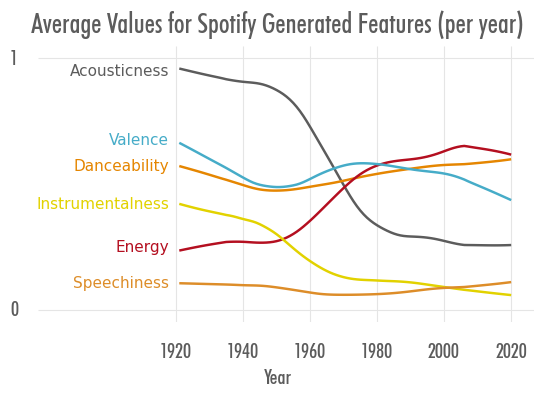

<ggplot: (106570100559)>

In [8]:
(ggplot(data_agg_1) 
 + geom_smooth(aes(x = "yr_num", y = "acousticness"), color=FMF_Palette[0], span=.3, se=False)
 + annotate("text", label="Acousticness", x = 1918.0, y=0.95, color=FMF_Palette[0], ha="right")
 + geom_smooth(aes(x = "yr_num", y = "danceability"), color=FMF_Palette[4], size=1, span=.3, se=False)
 + annotate("text", label="Danceability", x = 1918.0, y=0.57, color=FMF_Palette[4], ha="right" )
 + geom_smooth(aes(x = "yr_num", y = "energy"), color=FMF_Palette[5], span=.3, se=False)
 + annotate("text", label="Energy", x = 1918.0, y=0.25, color=FMF_Palette[5], ha="right" )
 + geom_smooth(aes(x = "yr_num", y = "instrumentalness"), color=FMF_Palette[2], span=.3, se=False)
 + annotate("text", label="Instrumentalness", x = 1918.0, y=0.42, color=FMF_Palette[2], ha="right" )
 + geom_smooth(aes(x = "yr_num", y = "speechiness"), color=FMF_Palette[3], span=.3, se=False)
 + annotate("text", label="Speechiness", x = 1918.0, y=0.105, color=FMF_Palette[3], ha="right" )
 + geom_smooth(aes(x = "yr_num", y = "valence"), color=FMF_Palette[1], span=.3, se=False)
 + annotate("text", label="Valence", x = 1918.0, y=0.675, color=FMF_Palette[1], ha="right" )
 + scale_x_continuous(limits=(1885.5,2020), breaks = range(1920,2021,20))
 + scale_y_continuous(limits=(0,1), breaks=[0,1])
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(), 
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Average Values for Spotify Generated Features (per year)")
 + labs(x="Year", y="",size=20)
 + coord_fixed(75)
)

#### Figure 1.1: Average Values for Spotify Generated Features (per year)

When new audio files are uploaded to Spotify, a whole suite of analysis is performed on each song to determine numerous characteristics without the user needing to lif a finger. Those variables are as follows:
- Acousticness
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Danceability
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Instrumentalness
    - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Valence
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
This plot shows the the trends of each of those five characteristics through the years. The value of each variable for any given year is the average value for that variable for that year. Those trends can be interpreted in terms of historical and musical movements:
- Acousticness
    - Acousticness starts very high, but quickly dips after the 1970s. This is likely due to the introduction of electronic music producing technology that became very popular very fast. Before then, however, every song had to be acoustic because the technology to make music in any other way didn't exist.
- Danceability
    - Danceability begins moderately high in the 1920's, many popular styles at the time were highly focused on dance: i.e. flappers. Danceability decreases in the 1930's as the world enters the great depression, and steadily increases from then on.
- Energy
    - Energy seems to be recripocal of instrumentalness to a certain degree. Many popular styles before the 1970's were low in energy in terms of music being fast and loud. That is not to say more energetic styles didn't exist; some forms of Jazz would be considered very energetic. But more and more popular styles developed into high energy states with the advent of music technology.
- Instrumentalness
    - The stark dropoff of instrumentalness in the 1970's was, once again, likely due to music technology.
- Valence
    - Valence seems to very clearly follow the state of the world. It decreases from the 1920's, a period of relative happiness, to the 30's-50's, during which time the Great Depression and World War II caused much turmoil that people put into their music. After the end of the war, valence increases to a head in the late 1970's where a downward trend started that still continues today.

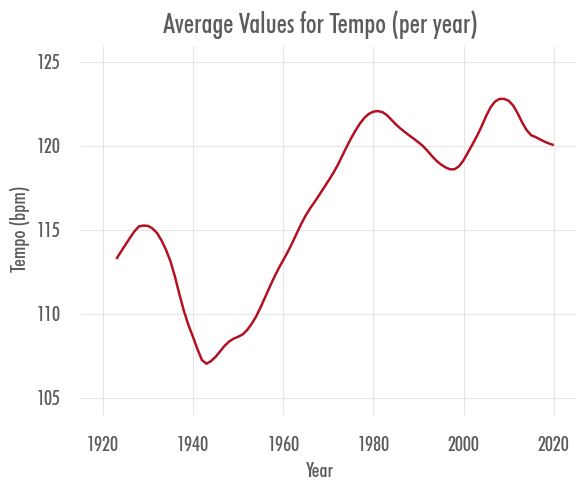

<ggplot: (106570208253)>

In [9]:
(ggplot(data_agg_1) 
 + geom_smooth(aes(x = "yr_num", y = "tempo"), color=FMF_Palette[5], span=.125, se=False)
 + scale_x_continuous(limits=(1920,2020), breaks = range(1920,2021,20))
 + scale_y_continuous(limits=(105,125))
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Average Values for Tempo (per year)")
 + labs(x="Year", y="Tempo (bpm)")
)

#### Figure 1.2: Average Values for Tempo (per year)
Tempo throughout the years seems to follow a trend something like the greater between Danceability and Energy for any given year. Songs with high danceability tend to have quicker tempos. Likewise, high tempo is an easy way to inject music with more energy.

In [10]:
data_agg_1["duration_min"] = data_agg_1["duration_ms"].div(60000)


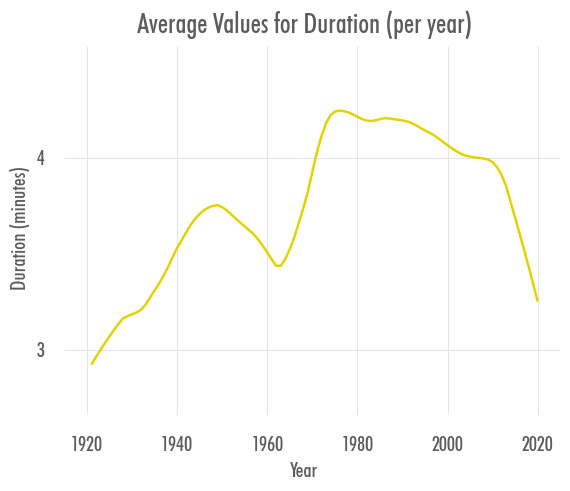

<ggplot: (106570239732)>

In [11]:
(ggplot(data_agg_1) 
 + geom_smooth(aes(x = "yr_num", y = "duration_min"), color=FMF_Palette[2], span=.15, se=False)
 + scale_x_continuous(limits=(1920,2020), breaks = range(1920,2021,20))
 + scale_y_continuous(limits=(2.75,4.5), breaks = [3,4])
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Average Values for Duration (per year)")
 + labs(x="Year", y="Duration (minutes)")
)

#### Figure 3: Average Values for Duration (per year)
It's difficult to say what caused the increase in average song duration  after the 1970's, likely the ability to make more music quicker and easier than ever before allowed some artists to compose longer songs, so they simply took the opportunity to do just that. However, the recent trend towards shorter songs could be interpreted in the same light as the increase in shorter form media of all kinds as prompted by the rise of the internet.

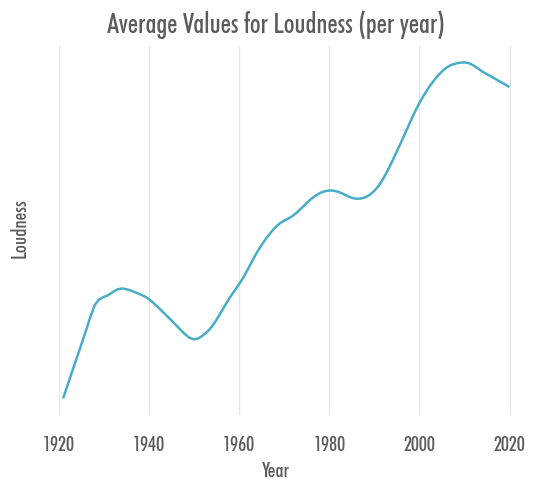

<ggplot: (106570237889)>

In [12]:
(ggplot(data_agg_1) 
 + geom_smooth(aes(x = "yr_num", y = "loudness"), color=FMF_Palette[1], span=.15, se=False)
 + scale_x_continuous(limits=(1920,2020), breaks = range(1920,2021,20))
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(),
         panel_grid_major_y=element_blank(),
         axis_text_y=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Average Values for Loudness (per year)")
 + labs(x="Year", y="Loudness")
)

#### Figure 1.4: Average Values for Loudness (per year)
Likely, the main reason for the steady increase in loudness of songs is simply because of advancements in music recording and producing technology. Speakers can make more sound than ever, microphones can pick up more sound than ever. Perhaps a general de-sensitization to experiences that would have previously been overwhelming is also a contributing factor in the ever increasing volume of music.

In [13]:
key_distro_1["percentage100"] = key_distro_1["percentage"] * 100

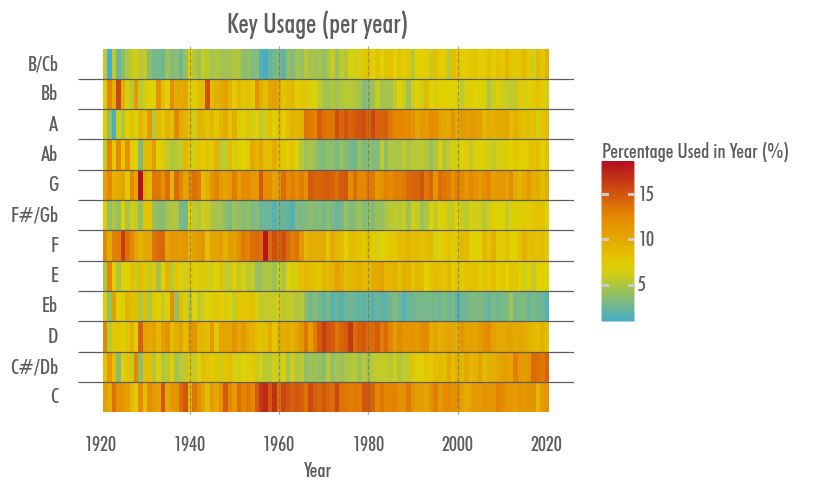

<ggplot: (106570290146)>

In [14]:
FMF_Palette2 = ["#46ACC8","#E2D200", "#E58601", "#B40F20"]
# FMF_Palette.reverse()

(ggplot(key_distro_1, aes(x = "yr_num", y = "key", fill = "percentage100")) 
 + geom_tile()
 + scale_x_continuous(limits=(1920,2021), breaks = range(1920,2021,20))
 + scale_y_discrete(breaks=range(0,12), labels=["C",
                                                "C#/Db",
                                                "D",
                                                "Eb",
                                                "E",
                                                "F",
                                                "F#/Gb",
                                                "G",
                                                "Ab",
                                                "A",
                                                "Bb",
                                                "B/Cb"])
 + geom_vline(xintercept=[1940,1960,1980,2000], linetype="dashed", color="#5C5C5C7F")
 + geom_hline(yintercept=np.array(range(1,12))+.5, color=FMF_Palette[0])
#  + scale_fill_gradientn(["#500660","#05A8AA","#43E000"], name="Percentage Used in Year (%)",)
 + scale_fill_gradientn(FMF_Palette2, name="Percentage Used in Year (%)",)
 + theme_minimal()
 + ggtitle("Key Usage (per year)")
 + labs(x="Year", y="")
 + theme(panel_grid_minor=element_blank(), 
         panel_grid_major=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
)

#### Figure 1.5: Key Usage (per year)
As expected, keys that are easier to play and easier to write in are more popular: C, A, G, and F, all have little to no flats and sharps, so are much easier for musicians. Keys with many flats (Gb, Eb, ect.) are chosen even less often than their sharped counterparts most likely because of the popularity of stringed instruments, on which flat keys are notoriously difficult to play proficiently. The increased use of guitars in popular music is probably one of the main reasons Eb is seldom used.

Fewer flat keys most likely because of more guitars

In [15]:
mode_distro_1["percentage100"] = mode_distro_1["percentage"] * 100
mode_distro_1 = mode_distro_1.append(pd.DataFrame({"year": [1921],
                                                           "mode": [0],
                                                           "number": [0],
                                                           "yr_num": [1921.0],
                                                           "percentage100": [0]}))

mode_distro_1.head()

,year,mode,number,percentage,yr_num,percentage100
0,1921,1,80,0.661157,1921.0,66.115702
0,1922,1,45,0.625000,1922.0,62.500000
0,1923,1,131,0.775148,1923.0,77.514793
0,1924,1,178,0.751055,1924.0,75.105485
0,1925,1,189,0.718631,1925.0,71.863118


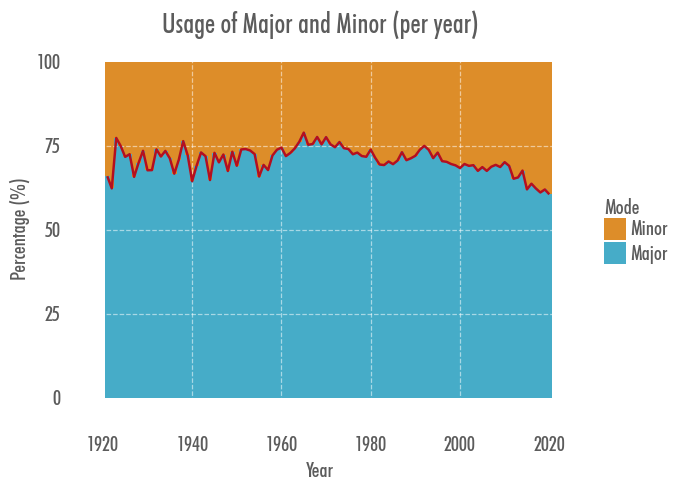

<ggplot: (106570343792)>

In [16]:
(ggplot(mode_distro_1, aes(x = "yr_num", y = "percentage100", fill = "mode")) 
 + geom_rect(xmin=1920.5,xmax=2020.5,ymin=0,ymax=100, fill=FMF_Palette[3])
 + geom_bar(position="stack", stat="identity", width=1)
 + scale_x_continuous(limits=(1920,2021), breaks = range(1920,2021,20))
 + scale_y_continuous(limits=(0,100), breaks=[0,25,50,75,100])
 + scale_fill_manual(name="Mode", labels=["Minor", "Major"], values=[FMF_Palette[3],FMF_Palette[1]])
 + geom_vline(xintercept=[1940,1960,1980,2000], linetype="dashed", color="#ffffff88")
 + geom_hline(yintercept=[25,50,75], linetype="dashed", color="#ffffff88")
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(), 
         panel_grid_major=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Usage of Major and Minor (per year)")
 + labs(x="Year", y="Percentage (%)", fill="Explicit?")
 + guides(color = guide_legend(reverse = True))
 + geom_line(aes(x = "yr_num", y = "percentage100"), color=FMF_Palette[5],size=1)
)

#### Figure 1.6: Usage of Major and Minor (per year)
Major and minor have both been in use for centuries and it's no surprise that Major is more common. Major is most often associated with happy, triumphant, positive music, while minor corresponds to sad, negative feelings. Both moods are essential parts of the human experience and so a heavy use of both is to be expected. People also tend to want to be happy, so major being more common is also understandable.

In [17]:
explicit_distro_1["percentage100"] = explicit_distro_1["percentage"] * 100
explicit_distro_1 = explicit_distro_1.append(pd.DataFrame({"year": [1921],
                                                           "explicit": [1],
                                                           "number": [0],
                                                           "yr_num": [1921.0],
                                                           "percentage100": [0]}))

explicit_distro_1.head()

,year,explicit,number,percentage,yr_num,percentage100
0,1921,0,121,1.0,1921.0,100.0
0,1922,0,72,1.0,1922.0,100.0
0,1923,0,169,1.0,1923.0,100.0
0,1924,0,237,1.0,1924.0,100.0
0,1925,0,263,1.0,1925.0,100.0


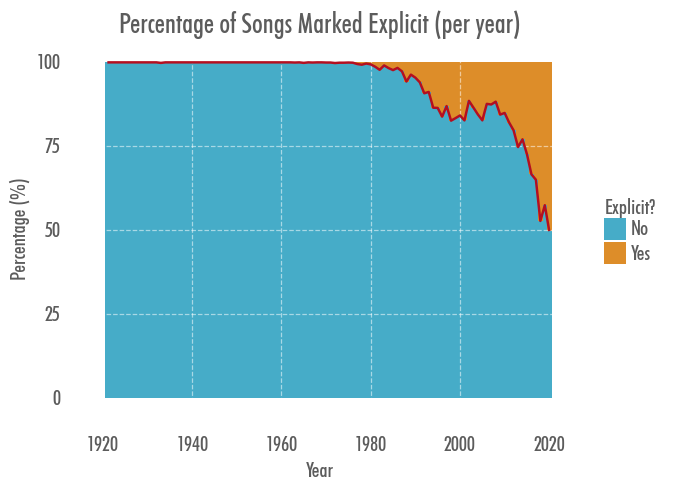

<ggplot: (106570230697)>

In [18]:
(ggplot(explicit_distro_1, aes(x = "yr_num", y = "percentage100", fill = "explicit")) 
 + geom_rect(xmin=1920.5,xmax=2020.5,ymin=0,ymax=100, fill=FMF_Palette[3])
 + geom_bar(position="stack", stat="identity", width=1)
 + scale_x_continuous(limits=(1920,2021), breaks = range(1920,2021,20))
 + scale_y_continuous(limits=(0,100), breaks=[0,25,50,75,100])
 + scale_fill_manual(name="Explicit?", labels=["No", "Yes"], values=[FMF_Palette[1],FMF_Palette[3]])
 + geom_vline(xintercept=[1940,1960,1980,2000], linetype="dashed", color="#ffffff88")
 + geom_hline(yintercept=[25,50,75], linetype="dashed", color="#ffffff88")
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(), 
         panel_grid_major=element_blank(),
         text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Percentage of Songs Marked Explicit (per year)")
 + labs(x="Year", y="Percentage (%)", fill="Explicit?")
 + guides(color = guide_legend(reverse = True))
 + geom_line(aes(x = "yr_num", y = "percentage100"), color=FMF_Palette[5],size=1)
)

#### Figure 1.7: Percentage of Songs Marked Explicit (per year)
Quite simply, words and concepts that were once taboo are gradually discussed and portrayed more often as time goes on. Counterculture movements created "edgy" songs that broke boundaries, and once those boundaries were broken, explicit themes became commonplace in music.

## 2- Can we predict if a track is major or minor given it's other characteristics?

### Changes since part 3:
* The variables were standardized. 
    * Deciding not to standardize when using LASSO was an error.

In [19]:
np.random.seed(11132013)
data_2 = pd.read_csv("../Data/data_modified.csv")
data_2.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year,name,artists
0,0.995,0.514,172133,0.2560,0.00000,0.3490,-15.145,0,0.0871,79.467,0.574,0,0,1,1921,Si J'avais Su,['Alice Cocéa']
1,0.994,0.426,177733,0.2260,0.00000,0.2350,-16.126,0,0.0693,73.630,0.552,0,9,1,1921,Elle Porte Un Nom Charmant,['André Urban']
2,0.971,0.540,122000,0.0848,0.00196,0.0887,-16.055,0,0.0750,100.296,0.527,0,5,0,1921,A Ballynure Ballad,['Christopher Lynch']
3,0.950,0.607,163200,0.1380,0.00000,0.1140,-15.683,0,0.1570,113.282,0.511,0,3,1,1921,I Met Her In The Garden Where The Praties Grow,['Christopher Lynch']
4,0.969,0.344,120067,0.1310,0.00000,0.1450,-14.261,0,0.0616,178.212,0.257,0,10,0,1921,Just A Little Bit Of Heaven,['Christopher Lynch']


**Data will be standardized so LASSO will work**

In [20]:
features_2 = ["acousticness",
              "danceability",
              "duration_ms",
              "energy",
              "instrumentalness",
              "loudness",
              "speechiness",
              "tempo",
              "valence",
              "explicit"]
X_2 = data_2[features_2]
y_2 = data_2[["mode"]]

In [21]:
## AGGREGATE DATA FOR MODES ##

z_total_2 = StandardScaler()
Xz_total_2 = z_total_2.fit_transform(X_2)

data_z_total_2 = pd.DataFrame({})
data_z_total_2["mode"] = y_2["mode"]

i_2 = 0
for name in features_2:
    data_z_total_2[name] = Xz_total_2[:,i_2]
    i_2 = i_2 + 1
    
data_z_mode_0_2 = data_z_total_2.loc[data_z_total_2["mode"] == 0]
data_z_mode_1_2 = data_z_total_2.loc[data_z_total_2["mode"] == 1]

data_z_mode_agg_2 = pd.DataFrame({})
data_z_mode_agg_2["mode"] = [0,1]

for name in features_2:
    data_z_mode_agg_2[name] = [data_z_mode_0_2[name].mean(),data_z_mode_1_2[name].mean()]
    
data_z_mode_agg_2.head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,explicit
0,0,-0.072352,0.068753,0.077513,0.064708,0.056706,0.024440,0.091361,-0.022580,-0.024198,0.129679
1,1,0.029630,-0.028157,-0.031744,-0.026500,-0.023223,-0.010009,-0.037415,0.009247,0.009910,-0.053108


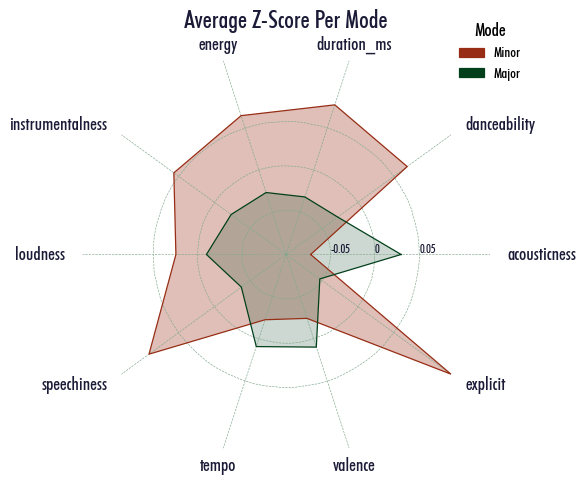

In [22]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

## BUUILD RADAR GRAPH FOR MODES ##

figure(num=None, figsize=(6,6), dpi=90, facecolor='w', edgecolor='k')

# number of variable
N_2 = len(features_2)

# Extract values for minor mode
# repeat the first value to close the circular graph:
values_minor_2=data_z_mode_agg_2.loc[0].drop('mode').values.flatten().tolist()
values_minor_2 += values_minor_2[:1]

# Extract values for major mode
# repeat the first value to close the circular graph:
values_major_2=data_z_mode_agg_2.loc[1].drop('mode').values.flatten().tolist()
values_major_2 += values_major_2[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles_2 = [n / float(N_2) * 2 * pi for n in range(N_2)]
angles_2 += angles_2[:1]

# Initialise the spider plot
ax_2 = plt.subplot(111, polar=True)
plt.grid(which='both',color=Cav_Palette[3], linestyle='dashed', linewidth=.5)
plt.grid(which='both',axis='y', sketch_params=0.2)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles_2[:-1], features_2, color=Cav_Palette[5])
for label in ax_2.get_xticklabels():
    label.set_fontproperties(futura)
    label.set_size(15)
    if label.get_position()[0] < 1.2 or label.get_position()[0] > 5.5:
        label.set_ha('left')
    elif 1.9 < label.get_position()[0] < 3.8:
        label.set_ha('right')

# Draw ylabels
ax_2.set_rlabel_position(0)
plt.yticks([-.05,0,.05], ["-0.05","0","0.05"], color=Cav_Palette[5])
plt.ylim(-.1,.13)
for label in ax_2.get_yticklabels():
    label.set_fontproperties(futura)
    label.set_size(10)


# Plot data and Fill area for minor
ax_2.plot(angles_2, values_minor_2, Cav_Palette[4], linewidth=1, linestyle='solid')
ax_2.fill(angles_2, values_minor_2, Cav_Palette[4], alpha=0.3)

# Plot data and Fill area for major
ax_2.plot(angles_2, values_major_2, Cav_Palette[1], linewidth=1, linestyle='solid')
ax_2.fill(angles_2, values_major_2, Cav_Palette[1], alpha=0.2)

minor_patch_2 = mpatches.Patch(color=Cav_Palette[4], label='Minor')
major_patch_2 = mpatches.Patch(color=Cav_Palette[1], label='Major')
ax_2.legend(handles=[minor_patch_2, major_patch_2],
            title="Mode",
            bbox_to_anchor=(1, 1),
            loc='center',
            framealpha=0)
ax_2.legend_.get_title().set_fontproperties(futura)
ax_2.legend_.get_title().set_fontsize(15)
for label in ax_2.legend_.get_texts():
    label.set_fontproperties(futura)
    label.set_fontsize(12)

# ax_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Average Z-Score Per Mode", fontproperties=futura, size=20, color=Cav_Palette[5])

ax_2.spines["polar"].set_visible(False)

#### Figure 2.1: Average Z-Score per Mode
This radar plot shows that the average z-score for each of the 10 predictor variables used are substantially different for both major and minor songs. This indicates that enough differences exist between the two data sets so that it is possible to predict the mode of a song given each of the predictor variables.

In [134]:
coef_names_2 = ["pass", "score"] + features_2 + ["intercept"] #Score will be a simple accuracy percentage
coefs_each_pass_2 = pd.DataFrame(columns=coef_names_2)
coefs_each_pass_2.head()

lr_2 = LogisticRegression(penalty='l1', solver='liblinear')
kf_2 = KFold(n_splits = 10, shuffle=True, random_state=1645)

# Steps:
# 1- Run K-fold
#    a) generate model with L1 penalty
#    b) calculate model effectiveness
#    c) put coefs and score in coef_names_2
# 2- Calculate optimal coefs
# 3- Reverse-transform coefs
# 4- Calculate overall score
# 5- Make confusion matrix

pass_indx_2 = 0
for train,test in kf_2.split(Xz_total_2):
    X_train = data_z_total_2[features_2].iloc[train]
    X_test = data_z_total_2[features_2].iloc[test]
    y_train = data_z_total_2[["mode"]].iloc[train]
    y_test = data_z_total_2[["mode"]].iloc[test]
    
    lr_temp = LogisticRegression(penalty='l1', solver='liblinear', C=.01)
    lr_temp.fit(X_train, y_train)
    
    results_dict_temp = {'pass':pass_indx_2,
                         'score': accuracy_score(y_test, lr_temp.predict(X_test))}
    
    feat_indx = 0
    for name in features_2:
        results_dict_temp[name] = lr_temp.coef_.flatten()[feat_indx]
        feat_indx = feat_indx + 1
    
    results_dict_temp['intercept'] = lr_temp.intercept_[0]
    
    coefs_each_pass_2 = coefs_each_pass_2.append(results_dict_temp, ignore_index=True)
    
    pass_indx_2 = pass_indx_2 + 1
coefs_each_pass_2.head(10)

,pass,score,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,explicit,intercept
0,0.0,0.704308,0.027455,-0.124496,-0.082721,-0.120056,-0.136193,0.040562,-0.074537,0.028460,0.085626,-0.108851,0.906068
1,1.0,0.707824,0.025208,-0.130667,-0.082777,-0.126634,-0.134393,0.047895,-0.069750,0.026471,0.091108,-0.113186,0.904339
2,2.0,0.714618,0.022962,-0.125163,-0.082971,-0.127744,-0.134999,0.046384,-0.076363,0.025504,0.087228,-0.116020,0.900392
3,3.0,0.707646,0.025602,-0.129185,-0.084664,-0.123209,-0.137846,0.045667,-0.074251,0.021360,0.088626,-0.112721,0.904403
4,4.0,0.707407,0.033468,-0.126861,-0.086957,-0.120012,-0.131320,0.046723,-0.075446,0.026012,0.087575,-0.111771,0.904696
5,5.0,0.707407,0.029743,-0.128885,-0.083006,-0.124932,-0.134395,0.048840,-0.075102,0.024900,0.088762,-0.113683,0.904964
6,6.0,0.711204,0.022018,-0.130896,-0.081881,-0.125877,-0.137083,0.040580,-0.073729,0.024528,0.088305,-0.110407,0.901933
7,7.0,0.711800,0.022341,-0.127522,-0.081605,-0.126294,-0.135908,0.041106,-0.072518,0.024547,0.091820,-0.110151,0.901411
8,8.0,0.704052,0.021531,-0.125275,-0.084101,-0.129069,-0.131419,0.046059,-0.075146,0.029076,0.091170,-0.112696,0.906471
9,9.0,0.711859,0.024997,-0.127679,-0.082329,-0.125015,-0.138435,0.040968,-0.075163,0.028234,0.090993,-0.111276,0.902044


In [24]:
print("Avg score: " + str(coefs_each_pass_2['score'].mean()))

Avg score: 0.7088125791989479


In [25]:
## Simple function to return a list of rgb tuples from list of hex codes ##
def hex_to_rgb(values):
    rgbList = []
    for value in values:
        temp = value.lstrip('#')
        length = len(temp)
        rgbList.append(tuple(int(temp[i:i + length // 3], 16)/255.0 for i in range(0, length, length // 3)))
    return(rgbList)

In [141]:
## Take the median of all coefficients calculated from the k-fold validation ##
## Using those medians, construct a new logistic regression ##

lr_2.coef_ = np.ndarray(shape=(1,10))

indx_2 = 0
for name in features_2:
    lr_2.coef_[0,indx_2] = coefs_each_pass_2[name].median()
    indx_2 = indx_2 + 1


lr_2.intercept_ = coefs_each_pass_2['intercept'].median()
lr_2.classes_ = np.array([0, 1])
pred_2 = lr_2.predict(Xz_total_2)

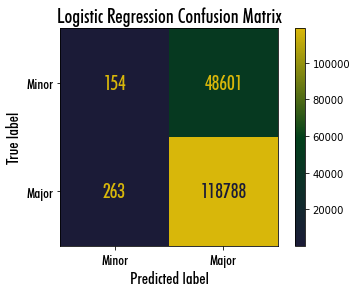

In [140]:
con_matrix_2 = plot_confusion_matrix(lr_2, Xz_total_2, y_2,
                   display_labels=["Minor", "Major"],
                   cmap=LinearSegmentedColormap.from_list(name='temp', 
                       colors=hex_to_rgb([Cav_Palette[5],
                                          Cav_Palette[1],
                                          Cav_Palette[0]])))

con_matrix_2.ax_.set_title("Logistic Regression Confusion Matrix", fontproperties=futura, size=20)
con_matrix_2.ax_.tick_params(axis='both', which='major', labelsize=15)

con_matrix_2.ax_.set_xlabel('Predicted label', fontsize=17, fontproperties=futura)
# con_matrix_2.ax_.get_xlabel().set_size(15)

con_matrix_2.ax_.set_ylabel('True label', fontsize=17, fontproperties=futura)
# con_matrix_2.ax_.get_ylabel().set_size(15)

for label in con_matrix_2.ax_.get_yticklabels() + con_matrix_2.ax_.get_xticklabels():
    label.set_fontproperties(futura)
    label.set_size(15)
for temp in con_matrix_2.text_:
    for text in temp:
        text.set_fontproperties(futura)
        text.set_size(20)

In [148]:
print("Accuracy: " + str(accuracy_score(y_2, pred_2)* 100) + "%")
print("R Squared: " + str(r2_score(y_2,pred_2)))

Accuracy: 70.88065980954197%
R Squared: -0.41268161147181015


#### Figure 2.2: Logistic Regression Confusion Matrix

This model heavily overpredicts songs to be Major when they should be Minor. This is likely due to a number of different reasons: 
- some predictors could have had a negative impact on accuracy that was not removed with the use of LASSO,
- There could be an error in how the logistic regression was constructed that caused some kind of bias,
- Logistic regression couls simply not be the model for the job, or
- It isn't actually possible to predict the mode of a song given the other predictors that spotify provides (however, this one is almost certainly not the case)


Despite the relatively high accuracy percentage, the logistic regression model created certainly didn't succeed in predicting the mode of songs. As shown by the R2 score, and by the fact that the percentage of songs that are major is right around 71%), guessing that every song is major would have been more effective than using this model.

## 3- Can we classify the songs into different "contexts" in which they would be played?

### Changes since part 3:
* Gaussian Mixture was used instead of HAC
    * The time complexity of HAC algorithms was too large for a data set of this size. 
    * Additionally, the generation of dendrograms for this data set require 100+ GB of RAM
* Principle Component Analysis was run before clustering instead of after.
    * This was in an effort to make the clusters more interpretable than they would have been
    * That is especially important with the lack of flexitility in numbers of clusters due to GM when compared to HAC
* The dendrogram was replaced with two plots that visualize PCA

Departure from original plan because dataset too big for HAC and dendrograms

In [27]:
data_3 = pd.read_csv("../Data/data_modified.csv")
data_3.dropna(inplace=True)
data_3.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year,name,artists
0,0.995,0.514,172133,0.2560,0.00000,0.3490,-15.145,0,0.0871,79.467,0.574,0,0,1,1921,Si J'avais Su,['Alice Cocéa']
1,0.994,0.426,177733,0.2260,0.00000,0.2350,-16.126,0,0.0693,73.630,0.552,0,9,1,1921,Elle Porte Un Nom Charmant,['André Urban']
2,0.971,0.540,122000,0.0848,0.00196,0.0887,-16.055,0,0.0750,100.296,0.527,0,5,0,1921,A Ballynure Ballad,['Christopher Lynch']
3,0.950,0.607,163200,0.1380,0.00000,0.1140,-15.683,0,0.1570,113.282,0.511,0,3,1,1921,I Met Her In The Garden Where The Praties Grow,['Christopher Lynch']
4,0.969,0.344,120067,0.1310,0.00000,0.1450,-14.261,0,0.0616,178.212,0.257,0,10,0,1921,Just A Little Bit Of Heaven,['Christopher Lynch']


In [28]:
features_3 = ["acousticness",
              "danceability",
              "energy",
              "instrumentalness",
              "loudness",
              "speechiness",
              "tempo",
              "valence",
              "explicit",
              "mode"]

data_3[features_3] = StandardScaler().fit_transform(data_3[features_3])

data_3[features_3].head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,explicit,mode
0,1.323086,-0.127024,-0.884465,-0.527539,-0.686569,0.025545,-1.223101,0.161090,-0.281784,0.639946
1,1.320436,-0.628447,-0.996881,-0.527539,-0.860778,-0.123006,-1.413196,0.077607,-0.281784,0.639946
2,1.259473,0.021123,-1.525984,-0.521231,-0.848170,-0.075436,-0.544761,-0.017260,-0.281784,-1.562633
3,1.203811,0.402888,-1.326633,-0.527539,-0.782109,0.608901,-0.121844,-0.077975,-0.281784,0.639946
4,1.254172,-1.095682,-1.352864,-0.527539,-0.529585,-0.187267,1.992740,-1.041822,-0.281784,-1.562633


In [29]:
# dendro_sing = sch.dendrogram(sch.linkage(data_3[features_3], method = 'ward'))
# MemoryError: Unable to allocate 105. GiB for an array with shape (14079342915,) and data type float64

In [31]:
pca_3 = PCA()
pca_3.fit(data_3[features_3])

PCA()

In [32]:
pcaDF_3 = pd.DataFrame({"expl_var" : pca_3.explained_variance_ratio_,
                      "pc": range(1,len(features_3)+1),
                      "cum_var": pca_3.explained_variance_ratio_.cumsum()})
pcaDF_3.head()

,expl_var,pc,cum_var
0,0.321866,1,0.321866
1,0.134997,2,0.456863
2,0.120541,3,0.577404
3,0.098306,4,0.675710
4,0.092807,5,0.768517


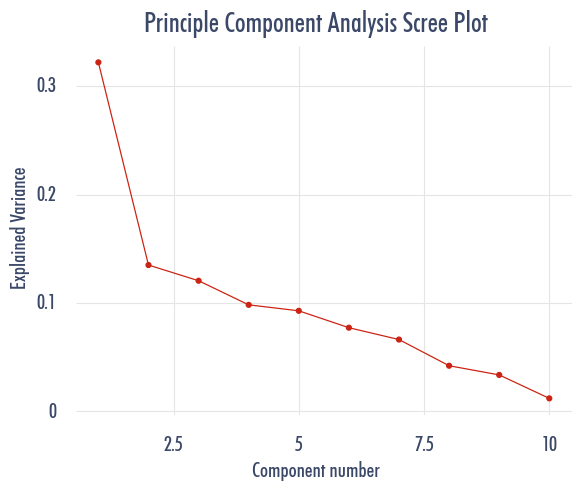

<ggplot: (106627998413)>

In [160]:
# (ggplot(data_agg_1) 
#  + geom_smooth(aes(x = "yr_num", y = "tempo"), color=FMF_Palette[5], span=.125, se=False)
#  + scale_x_continuous(limits=(1920,2020), breaks = range(1920,2021,20))
#  + scale_y_continuous(limits=(105,125))
#  + theme_minimal()
#  + theme(panel_grid_minor=element_blank(),
#          text=element_text(fontproperties=futura, color=FMF_Palette[0], size=15),
#          plot_title=element_text(size=20))
#  + ggtitle("Average Values for Tempo (per year)")
#  + labs(x="Year", y="Tempo (bpm)")
# )

(ggplot(pcaDF_3, aes(x = "pc", y = "expl_var"))
 + geom_line(color=BRk_Palette[1])
 + geom_point(color=BRk_Palette[1])
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(),
         text=element_text(fontproperties=futura, color=BRk_Palette[4], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Principle Component Analysis Scree Plot")
 + labs(x="Component number", y="Explained Variance")
 )

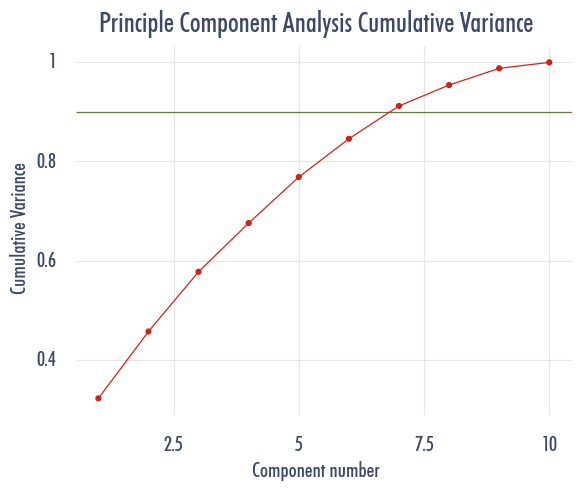

<ggplot: (106628073701)>

In [165]:
(ggplot(pcaDF_3, aes(x = "pc", y = "cum_var"))
 + geom_hline(yintercept = 0.9, color=BRk_Palette[3])
 + geom_line(color=BRk_Palette[1])
 + geom_point(color=BRk_Palette[1])
 + theme_minimal()
 + theme(panel_grid_minor=element_blank(),
         text=element_text(fontproperties=futura, color=BRk_Palette[4], size=15),
         plot_title=element_text(size=20))
 + ggtitle("Principle Component Analysis Cumulative Variance")
 + labs(x="Component number", y="Cumulative Variance")
)

#### Figure 3.1, 3.2: PCA Plots
These two plots both illustrate the explained variance for each principle component. In the scree plot, it is clear that dimensions for this data set are not very reducible; each variable contiains a similar amount of data. However, the cumulative explained variance plot shows that the first seven components account for over 90% of the total variance in the data set, which is more than enough for a clustering model to be effective. Additionally, the first 3 components account for two thirds of that variance, which will hopefully allow for clear plotting of clusters in 3D space.

In [35]:
loadings_3 = pd.DataFrame({"loading": pca_3.components_.flatten(),
                         "comp": np.repeat(range(1,len(features_3)+1), len(features_3), axis=0),
                         "variable":np.tile(features_3,len(features_3)) })

loadings_3['loading_abs'] = loadings_3['loading'].abs()
loadings_3.head(70)

,loading,comp,variable,loading_abs
0,0.437747,1,acousticness,0.437747
1,-0.311411,1,danceability,0.311411
2,-0.478315,1,energy,0.478315
3,0.309514,1,instrumentalness,0.309514
4,-0.467253,1,loudness,0.467253
5,-0.082979,1,speechiness,0.082979
6,-0.180206,1,tempo,0.180206
7,-0.299201,1,valence,0.299201
8,-0.196934,1,explicit,0.196934
9,0.028761,1,mode,0.028761


In [36]:
# loadings_3.to_csv('pca_loadings_3.csv', index=False)

Each principle component is a combination of all the variables contained in the model, however some variables are weighted stronger in certain components than in others. Because groups of variables might equally bias a component, it is possible to give the components new variable names that caputre the meaning of the groups of variables. Here are the names chosen for each of the first seven principle components:

### Naming Principle Components

1. **Calmness**
    - High in:
        - energy (negative)
        - loudness (negative)
        - acousticness (positive)
<br><br>
1. **Rappiness**
    - High in:
        - speechiness (positive)
        - danceability (positive)
        - explicit (positive)
<br><br>
1. **Edginess**
    - High in:
        - valence (negative)
        - explicit (positive)
<br><br>
1. **Mode**
    - High in:
        - mode (positive)
<br><br>
1. **Tempo**
    - High in:
        - tempo (positive)
<br><br>
1. **Instrumentalness**
    - High in:
        - instrumentalness (positive)
<br><br>
1. **Speechiness**
    - High in:
        - speechiness (positive)

Those seven components will be used as features in a gaussian mixture clustering model.

In [37]:
pc_names_3 = ['pc_calmness',
              'pc_rappiness',
              'pc_edginess',
              'pc_mode',
              'pc_tempo',
              'pc_instrumentalness',
              'pc_speechiness']

pc_comps_7_3 = pca_3.transform(data_3[features_3])

for i_3 in range(0,len(pc_names_3)):
    data_3[pc_names_3[i_3]] = pc_comps_7_3[:,i_3]

data_3[pc_names_3] = StandardScaler().fit_transform(data_3[pc_names_3])
data_3.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,...,year,name,artists,pc_calmness,pc_rappiness,pc_edginess,pc_mode,pc_tempo,pc_instrumentalness,pc_speechiness
0,1.323086,-0.127024,172133,-0.884465,-0.527539,0.3490,-0.686569,0,0.025545,-1.223101,...,1921,Si J'avais Su,['Alice Cocéa'],0.804485,0.615476,-0.783876,0.761558,-0.864348,-0.622119,-0.127392
1,1.320436,-0.628447,177733,-0.996881,-0.527539,0.2350,-0.860778,0,-0.123006,-1.413196,...,1921,Elle Porte Un Nom Charmant,['André Urban'],1.006105,0.425384,-0.603227,0.804349,-1.010193,-0.684703,-0.096013
2,1.259473,0.021123,122000,-1.525984,-0.521231,0.0887,-0.848170,0,-0.075436,-0.544761,...,1921,A Ballynure Ballad,['Christopher Lynch'],0.908429,0.934716,-0.215293,-1.184208,-0.305217,-1.560123,-0.782756
3,1.203811,0.402888,163200,-1.326633,-0.527539,0.1140,-0.782109,0,0.608901,-0.121844,...,1921,I Met Her In The Garden Where The Praties Grow,['Christopher Lynch'],0.728442,0.913777,-0.805287,0.863018,0.306618,-0.867981,-0.317512
4,1.254172,-1.095682,120067,-1.352864,-0.527539,0.1450,-0.529585,0,-0.187267,1.992740,...,1921,Just A Little Bit Of Heaven,['Christopher Lynch'],0.891932,-0.412555,0.709240,-1.023930,1.947709,-2.105982,-1.328758


In [38]:
# data_3.to_csv('data_pca_3.csv', index=False)

Based purly on silhouette score, the optimal number of clusters is 3. However, one of the clusters generated with only three possible clusters, was massive and expansive. So, in an effort to split that cluster into useful chunks, 4 clusters will be generated.

In [119]:
X_3 = data_3[pc_names_3]

k_best_GM_3 = 4
max_silhouette_gm_3 = 0


# for i in range(2,10):
#     print("Testing k=" + str(i))
#     km_test = KMeans(n_clusters=i)
    
#     km_test.fit(X_3)
#     tempAssignment = km_test.predict(X_3)

#     sil_test = silhouette_score(X_3, tempAssignment, sample_size=25000)

#     if sil_test > max_silhouette_km_3:
#         k_best_KM_3 = i
#         max_silhouette_km_3 = sil_test
    
#     print(str(i) + ":  " + str(sil_test))

gm_best_3 = GaussianMixture(n_components=k_best_GM_3)
gm_best_3.fit(X_3)
data_3["GM_Cat"] = gm_best_3.predict(X_3)

# max_silhouette_km_3 = silhouette_score(X_3, data_3["KM_Cat"], sample_size=25000)
print("The optimal number of groups is: k=" + str(k_best_GM_3))
# print("The silhouette Score for that many groups is:  " + str(max_silhouette_km_3))
print()



for i in range(0, k_best_GM_3):
    print("Average Scores for Cluster " + str(i))
    inGroup = data_3['GM_Cat'] == i
    dataCat = data_3.loc[inGroup]

    for name in pc_names_3:
        avg = dataCat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()

The optimal number of groups is: k=4

Average Scores for Cluster 0
	pc_calmness: 0.865787513985593
	pc_rappiness: -0.11199151840746639
	pc_edginess: 0.029891152497173227
	pc_mode: -0.44864842857800447
	pc_tempo: 0.19508650826867557
	pc_instrumentalness: 0.9766347236359881
	pc_speechiness: 0.26907583820591496

Average Scores for Cluster 1
	pc_calmness: -0.13779681219157563
	pc_rappiness: -0.3032158181356613
	pc_edginess: -0.26285098613119723
	pc_mode: 0.08368203541916518
	pc_tempo: -0.23350744251322697
	pc_instrumentalness: -0.47493752633254416
	pc_speechiness: -0.16511689838565127

Average Scores for Cluster 2
	pc_calmness: -0.47681735816141485
	pc_rappiness: 0.5931349073071691
	pc_edginess: -0.07906675155974198
	pc_mode: 0.1864725786234112
	pc_tempo: 0.5333363407253778
	pc_instrumentalness: -0.6078347569693434
	pc_speechiness: 1.110126805046153

Average Scores for Cluster 3
	pc_calmness: -1.2538395551847707
	pc_rappiness: 1.5873529735281744
	pc_edginess: 1.9495780489139847
	pc_mode: 0

In [127]:
data_3[['name','artists','year','popularity','GM_Cat']].to_csv('gm_clusters_3.csv', index=False)

(12585, 26)


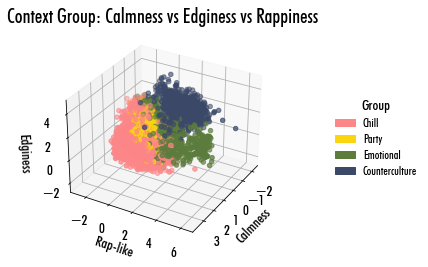

In [128]:
data_sub_3 = data_3.sample(frac=0.075, random_state = 623)
print(data_sub_3.shape)

fig_3 = plt.figure()
ax_3 = fig_3.add_subplot(111, projection='3d')

ax_3.set_title("Context Group: Calmness vs Edginess vs Rappiness",fontproperties=futura, size=20)

ax_3.scatter(data_sub_3['pc_calmness'],
           data_sub_3['pc_rappiness'], 
           data_sub_3['pc_edginess'], 
           c=data_sub_3['GM_Cat'],
           cmap=LinearSegmentedColormap.from_list(name='temp', 
                       colors=hex_to_rgb([BRk_Palette[0],
                                          BRk_Palette[2],
                                          BRk_Palette[3],
                                          BRk_Palette[4]])))

ax_3.set_xlabel('Calmness',fontproperties=futura, size=15)
ax_3.set_ylabel('Rap-like',fontproperties=futura, size=15)
ax_3.set_zlabel('Edginess',fontproperties=futura, size=15)

for label in ax_3.get_xticklabels():
    label.set_fontproperties(futura)
    label.set_size(15)
for label in ax_3.get_yticklabels():
    label.set_fontproperties(futura)
    label.set_size(15)
for label in ax_3.get_zticklabels():
    label.set_fontproperties(futura)
    label.set_size(15)

group_0_patch_3 = mpatches.Patch(color=BRk_Palette[0], label='Chill')
group_1_patch_3 = mpatches.Patch(color=BRk_Palette[2], label='Party')
group_2_patch_3 = mpatches.Patch(color=BRk_Palette[3], label='Emotional')
group_3_patch_3 = mpatches.Patch(color=BRk_Palette[4], label='Counterculture')


lgd_3 = ax_3.legend(handles=[group_0_patch_3,
                     group_1_patch_3,
                     group_2_patch_3,
                     group_3_patch_3],
            title="Group",
            bbox_to_anchor=(1.25, .5),
            loc='center left',
            framealpha=0)
ax_3.legend_.get_title().set_fontproperties(futura)
ax_3.legend_.get_title().set_fontsize(15)
for label in ax_3.legend_.get_texts():
    label.set_fontproperties(futura)
    label.set_fontsize(12)

# for angle in range(0,360,2):
#     ax_3.view_init(30*np.cos(4*pi*(angle/180.0)), angle)
#     plt.savefig('rotatingPlot/'+str(angle)+'clusters.png',
#                 bbox_extra_artists=(lgd_3,),
#                 bbox_inches='tight')

ax_3.view_init(30, 30)
plt.show()



#### Figure 3.3 Context Group: Calmness vs Edginess vs Rappiness

This figure shows a subset of data points plotted according to the first three principle components, and colored based on their "context group". 

Songs that were low in edginess and with characteristics far from Rap styles (i.e. songs with more melodic vocal lines or instrumental pieces), placed into one of two groups: songs that should be played in a relaxed, or "Chill" environment, or songs that could be played in a much more exciting environment, "Party" environment. Those two gropus were distinguished from one another almost entirely by their level of Calmness. The third group, ment to be played in more emotional contexts, such as when one is sad or intimate, is characterized by a slightly heavier use of rap/hip-hop like traits, low edginess (little use of explicit content, and low valence), and moderate calmness. Finally, songs with low calmness and high edginess are likely playable in "Countercultural". These songs tended to be grungier, angrier songs with high degrees of explicit content.

For an animated version of 3D plot, see [here](https://imgflip.com/gif/4q1ar1).

Although lacking the initially planned higherarcical structure that would have allowed for much more specific groupings of songs, it is still possible to determine appropriate social contexts in which songs should be played, albeit very generally. 